Home             int64
Price            int64
SqFt             int64
Bedrooms         int64
Bathrooms        int64
Offers           int64
Brick           object
Neighborhood    object
dtype: object


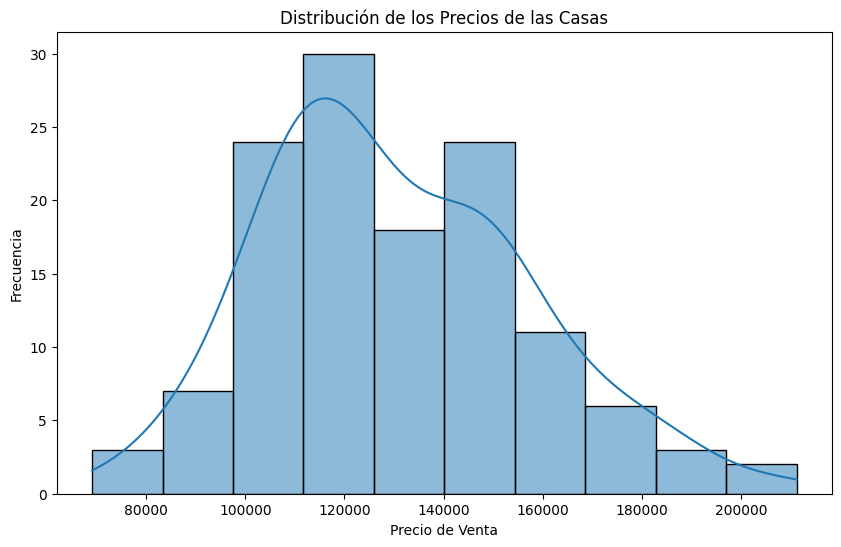

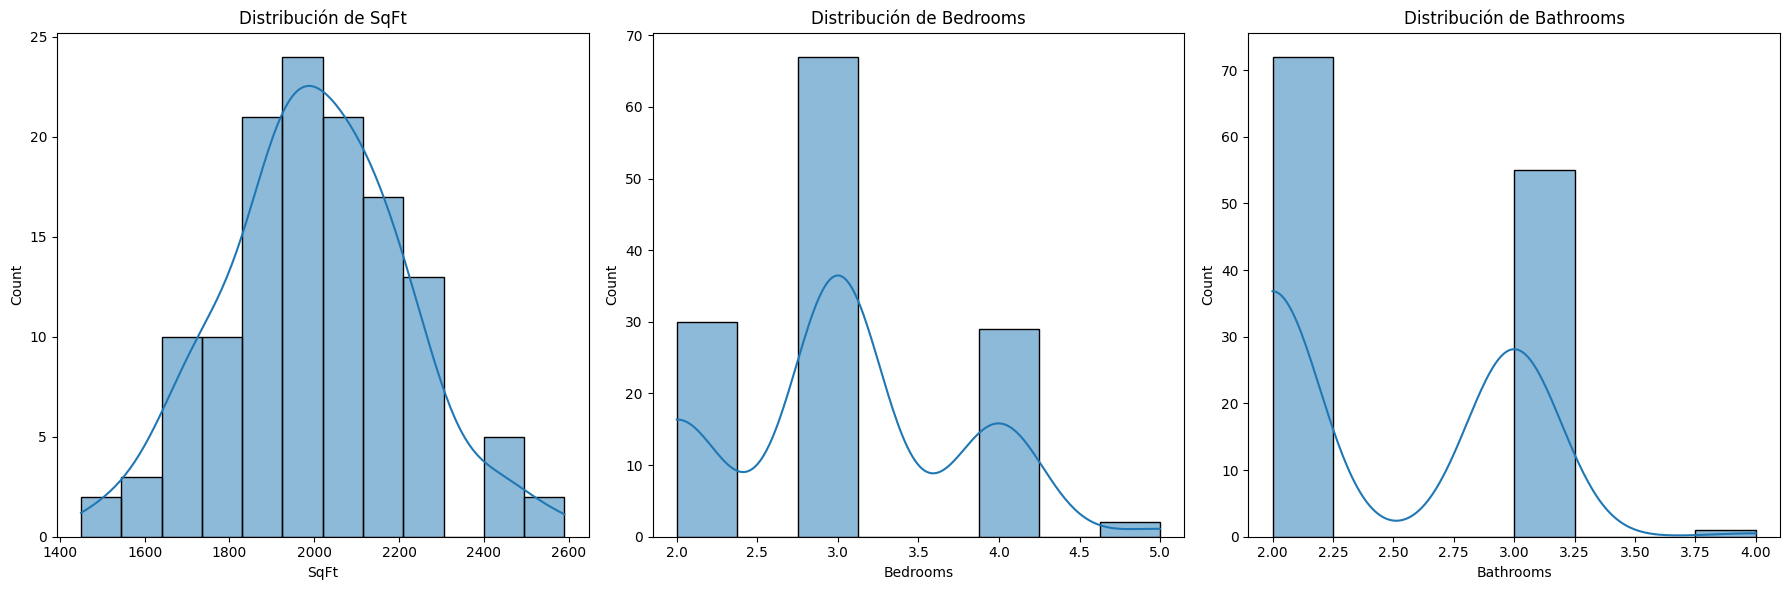

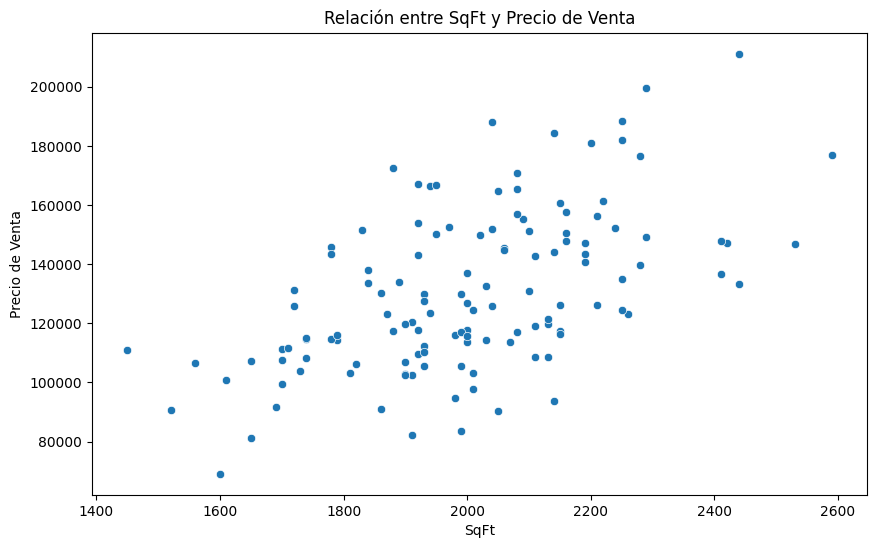

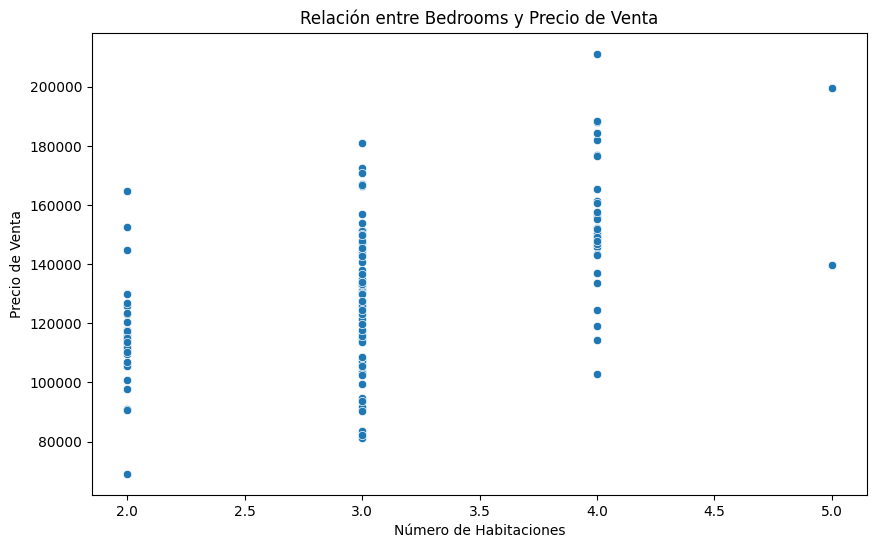

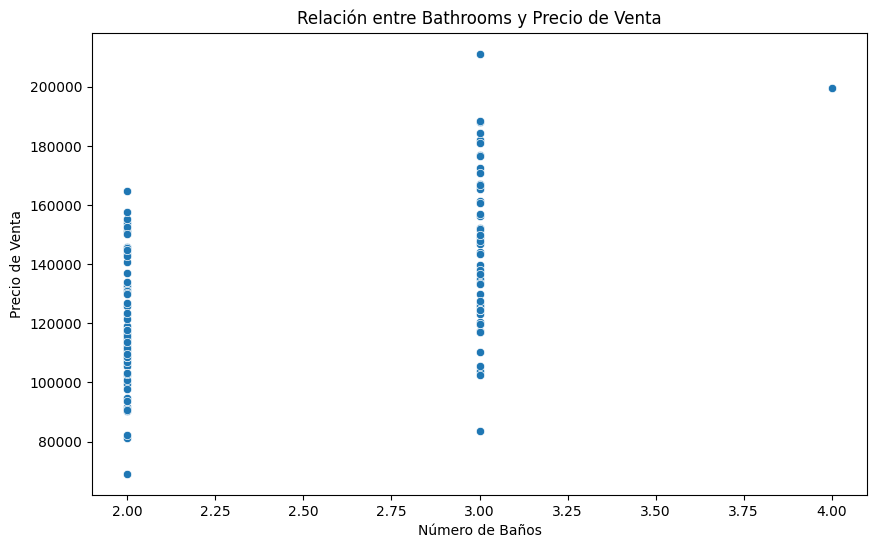

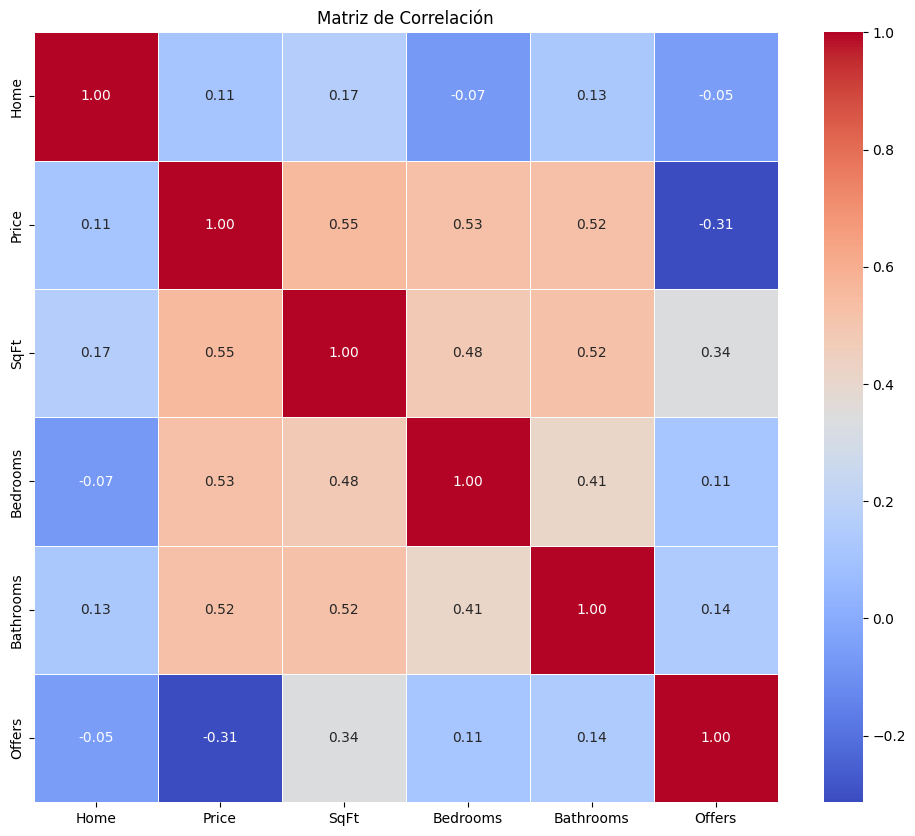

Estadísticas Descriptivas del Dataset:
             Home          Price         SqFt    Bedrooms   Bathrooms  \
count  128.000000     128.000000   128.000000  128.000000  128.000000   
mean    64.500000  130427.343750  2000.937500    3.023438    2.445312   
std     37.094474   26868.770371   211.572431    0.725951    0.514492   
min      1.000000   69100.000000  1450.000000    2.000000    2.000000   
25%     32.750000  111325.000000  1880.000000    3.000000    2.000000   
50%     64.500000  125950.000000  2000.000000    3.000000    2.000000   
75%     96.250000  148250.000000  2140.000000    3.000000    3.000000   
max    128.000000  211200.000000  2590.000000    5.000000    4.000000   

           Offers  
count  128.000000  
mean     2.578125  
std      1.069324  
min      1.000000  
25%      2.000000  
50%      3.000000  
75%      3.000000  
max      6.000000  

Media de cada columna:
Home             64.500000
Price        130427.343750
SqFt           2000.937500
Bedrooms          

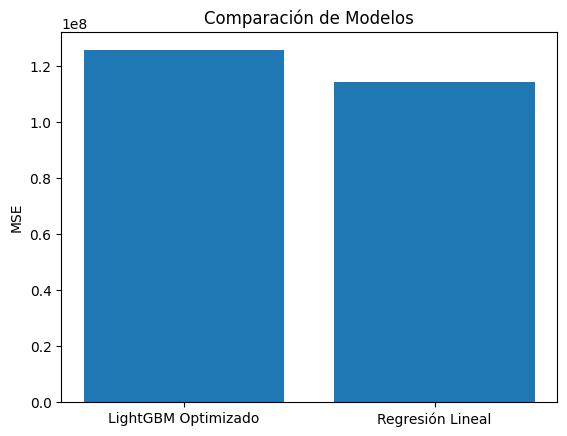

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 74
[LightGBM] [Info] Number of data points in the train set: 81, number of used features: 8
[LightGBM] [Info] Start training from score 130462.962963
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb

# Cargar los datos
df = pd.read_csv('/content/house-prices.csv')

# Mostrar las primeras filas del dataframe
df.head()

# Eliminar duplicados
df.drop_duplicates(inplace=True)

# Verificar tipos de datos
print(df.dtypes)

# Convertir columnas categóricas a tipo 'category' si es necesario
categoricals = df.select_dtypes(include=['object']).columns
df[categoricals] = df[categoricals].apply(lambda x: x.astype('category'))

# Separar las columnas numéricas y categóricas
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['category', 'object']).columns

# Rellenar valores faltantes en columnas numéricas con la mediana
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Rellenar valores faltantes en columnas categóricas con la moda
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Visualización univariada

# Visualización de la distribución de 'Price'
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Distribución de los Precios de las Casas')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de la distribución de algunas características
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(df['SqFt'], kde=True, ax=axs[0]).set(title='Distribución de SqFt')
sns.histplot(df['Bedrooms'], kde=True, ax=axs[1]).set(title='Distribución de Bedrooms')
sns.histplot(df['Bathrooms'], kde=True, ax=axs[2]).set(title='Distribución de Bathrooms')
plt.tight_layout()
plt.show()

# Visualización multivariada

# Gráfico de dispersión entre 'Price' y 'SqFt'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['SqFt'], y=df['Price'])
plt.title('Relación entre SqFt y Precio de Venta')
plt.xlabel('SqFt')
plt.ylabel('Precio de Venta')
plt.show()

# Gráfico de dispersión entre 'Price' y 'Bedrooms'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Bedrooms'], y=df['Price'])
plt.title('Relación entre Bedrooms y Precio de Venta')
plt.xlabel('Número de Habitaciones')
plt.ylabel('Precio de Venta')
plt.show()

# Gráfico de dispersión entre 'Price' y 'Bathrooms'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Bathrooms'], y=df['Price'])
plt.title('Relación entre Bathrooms y Precio de Venta')
plt.xlabel('Número de Baños')
plt.ylabel('Precio de Venta')
plt.show()

# Matriz de correlación
plt.figure(figsize=(12, 10))
corr_matrix = df.select_dtypes(include=[np.number]).corr()  # Solo columnas numéricas
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

# Estadísticas descriptivas
# Filtrar solo las columnas numéricas
numerical_df = df.select_dtypes(include=[np.number])

# Estadísticas descriptivas del dataset
print("Estadísticas Descriptivas del Dataset:")
print(numerical_df.describe())

# Estadísticas adicionales: media, mediana, moda para cada variable
print("\nMedia de cada columna:")
print(numerical_df.mean())

print("\nMediana de cada columna:")
print(numerical_df.median())

print("\nModa de cada columna:")
print(numerical_df.mode().iloc[0])  # Tomamos la primera fila de las modas para cada columna

# Rango (máximo - mínimo)
print("\nRango de cada columna:")
print(numerical_df.max() - numerical_df.min())

# Desviación estándar
print("\nDesviación estándar de cada columna:")
print(numerical_df.std())

# Preparación de los datos

# Definir características (X) y variable objetivo (y)
X = df.drop(columns=['Price'])
y = df['Price']

# Convertir variables categóricas a variables dummy
X = pd.get_dummies(X, drop_first=True)

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo 1: LightGBM

# Parámetros base para el modelo LightGBM
params = {
    'objective': 'regression',      # Tipo de tarea (regresión)
    'metric': 'l2',                 # Métrica L2 (Error cuadrático medio)
    'boosting_type': 'gbdt',        # Tipo de boosting (GBDT)
    'num_leaves': 16,               # Ajustar a un valor moderado
    'learning_rate': 0.05,          # Tasa de aprendizaje baja
    'max_depth': 3,                 # Limitar la profundidad máxima de los árboles
    'min_data_in_leaf': 30,         # Aumentar el mínimo de datos por hoja
    'feature_fraction': 0.8,        # Proporción de características a usar
    'subsample': 0.8,               # Proporción de datos a usar en cada iteración
    'max_bin': 255,                 # Aumentar el número de bins
}

# Crear los datasets LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Optimización de hiperparámetros con GridSearch

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'num_leaves': [16, 32, 64],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_data_in_leaf': [20, 30, 40],
    'feature_fraction': [0.7, 0.8, 0.9],
    'subsample': [0.7, 0.8, 0.9]
}

# Crear el modelo LightGBM
lgb_model = lgb.LGBMRegressor(objective='regression', metric='l2')

# Aplicar GridSearchCV
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros encontrados:", grid_search.best_params_)

# Modelo optimizado LightGBM

# Usar el mejor modelo encontrado por GridSearch
best_lgb_model = grid_search.best_estimator_

# Hacer predicciones con el modelo optimizado
y_pred_lgb = best_lgb_model.predict(X_test)

# Evaluar el modelo
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = mse_lgb ** 0.5
r2_lgb = r2_score(y_test, y_pred_lgb)

# Imprimir las métricas de LightGBM
print("Modelo LightGBM Optimizado:")
print("MSE:", mse_lgb)
print("RMSE:", rmse_lgb)
print("R^2:", r2_lgb)

# Modelo 2: Regresión Lineal

# Crear el modelo de regresión lineal
lr_model = LinearRegression()

# Ajustar el modelo
lr_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_lr = lr_model.predict(X_test)

# Evaluar el modelo
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mse_lr ** 0.5
r2_lr = r2_score(y_test, y_pred_lr)

# Imprimir las métricas de regresión lineal
print("Modelo de Regresión Lineal:")
print("MSE:", mse_lr)
print("RMSE:", rmse_lr)
print("R^2:", r2_lr)

# Comparación de los modelos

# Comparación de modelos en base al MSE
models = ['LightGBM Optimizado', 'Regresión Lineal']
mse_values = [mse_lgb, mse_lr]

plt.bar(models, mse_values)
plt.ylabel('MSE')
plt.title('Comparación de Modelos')
plt.show()

# Validación cruzada para el modelo optimizado

# Realizar validación cruzada en el modelo optimizado
cv_scores = cross_val_score(best_lgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calcular el MSE promedio y desviación estándar
print(f'MSE Promedio de Validación Cruzada: {-cv_scores.mean()}')
print(f'Desviación Estándar de MSE: {cv_scores.std()}')

# Conclusiones

# Basado en los valores de MSE, RMSE y R^2, podemos concluir cuál modelo se adapta mejor a los datos.
# Si el modelo LightGBM tiene mejores métricas, entonces podemos considerarlo más efectivo para este conjunto de datos.
